<a href="https://colab.research.google.com/github/LudovicaCi/PodcastSentimentAnalyzer/blob/main/StreamingAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Event identification


In [ ]:
import pandas as pd


reviews = pd.read_csv('/content/drive/MyDrive/DataMining/Dataset/reviews_podcast_cleaned.csv')

In [ ]:
print(reviews.columns)

Index(['content', 'rating', 'created_at', 'Year'], dtype='object')


In [ ]:
# Check for the presence of NaN values in rows
nan_rows = reviews[reviews.isnull().any(axis=1)]

# Print the rows containing NaN values
print("Rows with NaN values:")
print(nan_rows)

Rows with NaN values:
        content  rating                 created_at  Year
275         NaN       5  2017-09-15 03:44:08+00:00  2017
506         NaN       5  2019-05-03 22:34:54+00:00  2019
854         NaN       5  2016-04-02 18:37:15+00:00  2016
867         NaN       5  2016-09-25 13:50:36+00:00  2016
975         NaN       5  2017-07-25 16:46:03+00:00  2017
...         ...     ...                        ...   ...
5429411     NaN       4  2023-02-16 05:23:24+00:00  2023
5429650     NaN       5  2023-02-26 20:48:03+00:00  2023
5429870     NaN       5  2023-02-19 03:56:11+00:00  2023
5430200     NaN       3  2023-02-27 15:40:22+00:00  2023
5430614     NaN       5  2023-03-03 10:24:13+00:00  2023

[28252 rows x 4 columns]


In [ ]:
reviews = reviews.dropna()

In [ ]:
# Filter reviews for the year 2021 and select columns 'content', 'rating', and 'created_at'
reviews = reviews.loc[reviews['Year'].isin([2021]), ['content', 'rating', 'created_at']].copy()

In [ ]:
# Remove reviews with a rating of 2 or 4
reviews = reviews[(reviews['rating'] != 2) & (reviews['rating'] != 4)]

In [ ]:
reviews.head()

,content,rating,created_at
2961437,how bout that,5,2021-01-07 17:13:31+00:00
2961724,great report thank you,5,2021-01-07 14:46:02+00:00
2961884,murray,5,2021-01-07 12:05:07+00:00
2962129,kentucky fried chickens,5,2021-01-08 00:32:43+00:00
2962618,this is so god,5,2021-01-03 15:17:50+00:00


In [ ]:
print(reviews.shape[0])

901190


In [ ]:
reviews['date'] = pd.to_datetime(reviews['created_at'])
reviews['date'] = reviews['date'].dt.strftime('%Y-%m-%d')

In [ ]:
reviews.drop('created_at', axis=1, inplace=True)

In [ ]:
# Map ratings to classes
class_mapping = {
    5: 'positive',
    3: 'neutral',
    1: 'negative'
}

# Replace values in the 'rating' column with the corresponding classes
reviews['rating'] = reviews['rating'].replace(class_mapping)

# Display the DataFrame with ratings replaced by classes
print(reviews.head())

                         content    rating        date
2961437            how bout that  positive  2021-01-07
2961724   great report thank you  positive  2021-01-07
2961884                   murray  positive  2021-01-07
2962129  kentucky fried chickens  positive  2021-01-08
2962618           this is so god  positive  2021-01-03


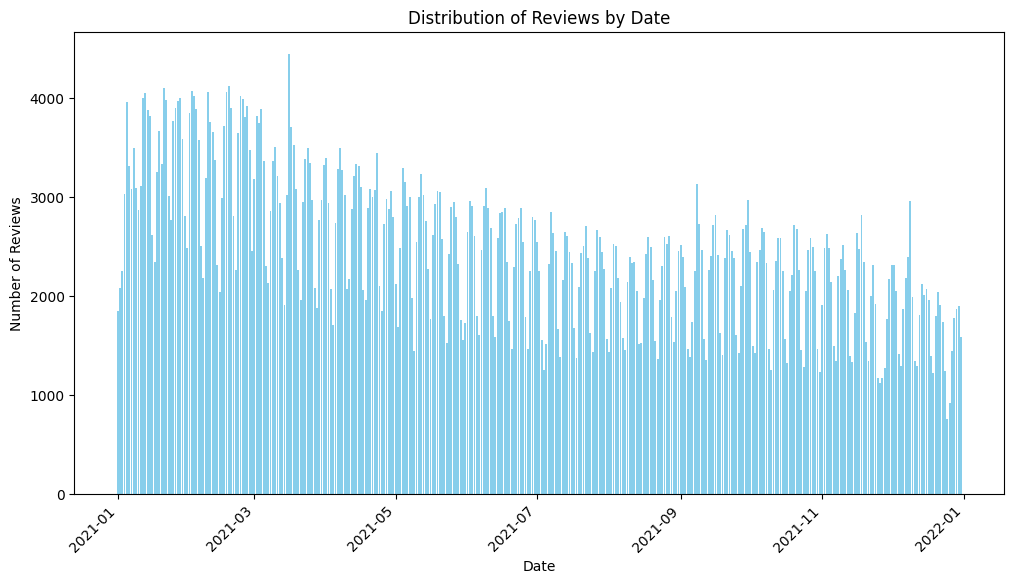

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the number of reviews for each date
reviews_per_date = reviews['date'].value_counts()

# Sort dates chronologically
reviews_per_date = reviews_per_date.sort_index()

# Plot the distribution of reviews by date
plt.figure(figsize=(12, 6))
bar_plot = plt.bar(reviews_per_date.index, reviews_per_date.values, color='skyblue')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

plt.title('Distribution of Reviews by Date')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')

plt.show()

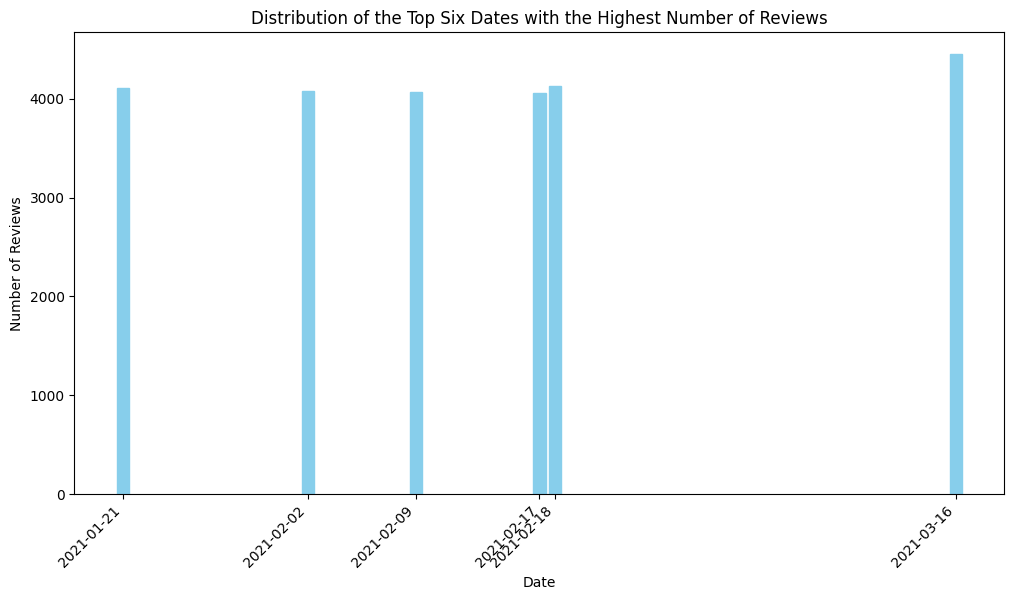

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the number of reviews for each date
reviews_per_date = reviews['date'].value_counts()

# Select the top 6 dates with the highest number of reviews
top_dates = reviews_per_date.head(6)

# Sort dates chronologically
top_dates = top_dates.sort_index()

# Plot the distribution of reviews by date
plt.figure(figsize=(12, 6))
bar_plot = plt.bar(top_dates.index, top_dates.values, color='skyblue')

# Highlight the top 6 dates with the highest number of reviews in blue
for bar in bar_plot:
    if bar.get_height() in top_dates.values:
        bar.set_color('skyblue')

# Rotate x-axis labels
plt.xticks(top_dates.index, rotation=45, ha='right')

plt.title('Distribution of the Top Six Dates with the Highest Number of Reviews')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')

plt.show()

In [ ]:
# List to contain the 6 separate DataFrames, one for each date in top_dates
dataframes_per_date = []

# Sort the dates in ascending order
sorted_dates = top_dates.index.sort_values()

# Check the correctness of the order of dates
if all(sorted_dates[i] <= sorted_dates[i+1] for i in range(len(sorted_dates)-1)):
    print("Dates are correctly sorted in ascending order.")
else:
    print("Error: Dates are not sorted in ascending order.")

Le date sono correttamente ordinate in modo crescente.


In [ ]:
# Iterate over each sorted date
for date in sorted_dates:
    # Filter the DataFrame for reviews corresponding to that date
    dataframe_per_date = reviews[reviews['date'] == date]

    # Add the DataFrame to the list
    dataframes_per_date.append(dataframe_per_date)

# Now dataframes_per_date contains 6 DataFrames, each containing reviews associated with a date in top_dates

# Save each DataFrame to a separate CSV file
for i, dataframe in enumerate(dataframes_per_date):
    dataframe.to_csv(f'/content/drive/MyDrive/DataMining/Dataset/event_{i+1}.csv', index=False)

# Import Datasets

In [ ]:
import pandas as pd

# Load the DataFrames from CSV files
df = pd.read_csv("/content/drive/MyDrive/DataMining/Dataset/trainingSet.csv")
df1 = pd.read_csv("/content/drive/MyDrive/DataMining/Dataset/event_1.csv")
df2 = pd.read_csv("/content/drive/MyDrive/DataMining/Dataset/event_2.csv")
df3 = pd.read_csv("/content/drive/MyDrive/DataMining/Dataset/event_3.csv")
df4 = pd.read_csv("/content/drive/MyDrive/DataMining/Dataset/event_4.csv")
df5 = pd.read_csv("/content/drive/MyDrive/DataMining/Dataset/event_5.csv")
df6 = pd.read_csv("/content/drive/MyDrive/DataMining/Dataset/event_6.csv")

# Drop rows with NaN values in 'content' or 'rating' columns for each DataFrame
df = df.dropna(subset=['content', 'rating'])
df1 = df1.dropna(subset=['content', 'rating'])
df2 = df2.dropna(subset=['content', 'rating'])
df3 = df3.dropna(subset=['content', 'rating'])
df4 = df4.dropna(subset=['content', 'rating'])
df5 = df5.dropna(subset=['content', 'rating'])
df6 = df6.dropna(subset=['content', 'rating'])

# Remove the 'date' column from each DataFrame df1 to df6
for i in range(1, 7):
    dataset_name = f'df{i}'
    dataset = globals()[dataset_name]

    # Check if the 'date' column is present before removing it
    if 'date' in dataset.columns:
        dataset.drop('date', axis=1, inplace=True)

In [ ]:
import pandas as pd
import numpy as np

# Iterate over each DataFrame
for i in range(1, 7):
    # Select the current DataFrame (df1, df2, ..., df6)
    current_df = globals()["df" + str(i)]

    # Create a balanced DataFrame
    balanced_df = pd.DataFrame()

    # Iterate over each class and randomly select the same number of samples from the minority class
    for rating_class in current_df['rating'].unique():
        class_samples = current_df[current_df['rating'] == rating_class].sample(n=60, replace=True)
        balanced_df = pd.concat([balanced_df, class_samples])

    # Replace the original DataFrame with the balanced DataFrame
    globals()["df" + str(i)] = balanced_df

# Custom Analyzer


In [ ]:
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn import metrics
import matplotlib.pyplot as plt
from nltk.stem.snowball import EnglishStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import string
import nltk

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

# Initialize the stemmer
stemmer = EnglishStemmer()

# Update the list of stopwords in English
stop_words = set(stopwords.words('english'))

# Define the custom analysis function
def custom_analyzer(text):
    # Remove accents
    text = ''.join(char for char in text if char not in string.punctuation)
    # Tokenization and lowercase
    tokens = text.lower().split()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))  # Replace with the appropriate language
    tokens = [word for word in tokens if word not in stop_words]
    # Stemming
    stemmer = PorterStemmer()  # Replace with the appropriate language
    tokens = [stemmer.stem(word) for word in tokens]
    return tokens

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Static Model


event  1
Classification Report:
              precision    recall  f1-score   support

    negative       0.70      0.72      0.71        60
     neutral       0.72      0.60      0.65        60
    positive       0.74      0.85      0.79        60

    accuracy                           0.72       180
   macro avg       0.72      0.72      0.72       180
weighted avg       0.72      0.72      0.72       180



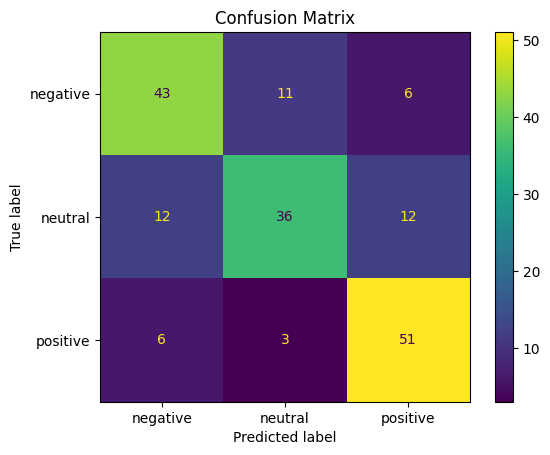

event  2
Classification Report:
              precision    recall  f1-score   support

    negative       0.69      0.75      0.72        60
     neutral       0.74      0.67      0.70        60
    positive       0.82      0.83      0.83        60

    accuracy                           0.75       180
   macro avg       0.75      0.75      0.75       180
weighted avg       0.75      0.75      0.75       180



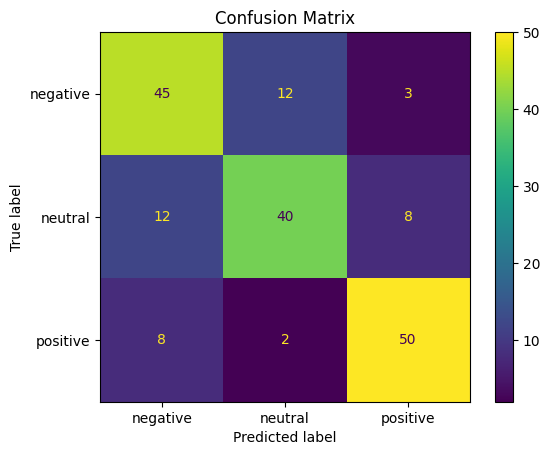

event  3
Classification Report:
              precision    recall  f1-score   support

    negative       0.67      0.65      0.66        60
     neutral       0.66      0.70      0.68        60
    positive       0.79      0.77      0.78        60

    accuracy                           0.71       180
   macro avg       0.71      0.71      0.71       180
weighted avg       0.71      0.71      0.71       180



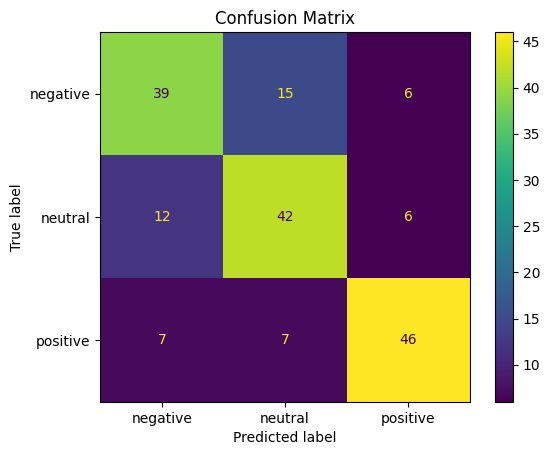

event  4
Classification Report:
              precision    recall  f1-score   support

    negative       0.67      0.75      0.71        60
     neutral       0.70      0.63      0.67        60
    positive       0.86      0.85      0.86        60

    accuracy                           0.74       180
   macro avg       0.75      0.74      0.74       180
weighted avg       0.75      0.74      0.74       180



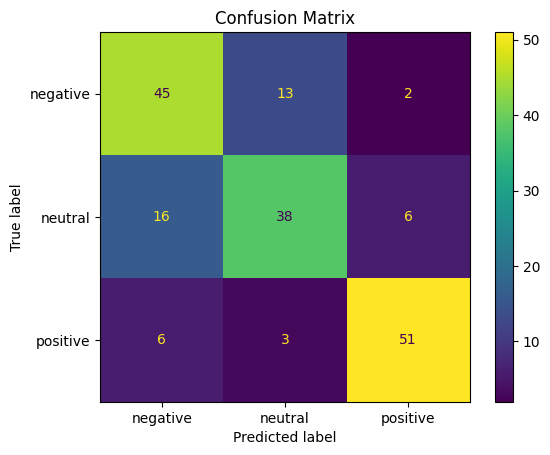

event  5
Classification Report:
              precision    recall  f1-score   support

    negative       0.69      0.77      0.72        60
     neutral       0.77      0.62      0.69        60
    positive       0.85      0.92      0.88        60

    accuracy                           0.77       180
   macro avg       0.77      0.77      0.76       180
weighted avg       0.77      0.77      0.76       180



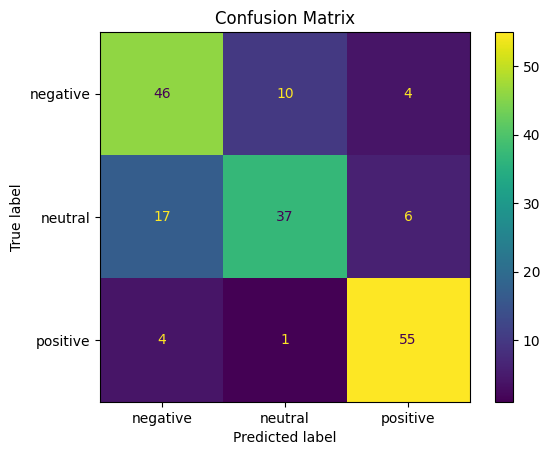

event  6
Classification Report:
              precision    recall  f1-score   support

    negative       0.72      0.78      0.75        60
     neutral       0.76      0.68      0.72        60
    positive       0.84      0.85      0.84        60

    accuracy                           0.77       180
   macro avg       0.77      0.77      0.77       180
weighted avg       0.77      0.77      0.77       180



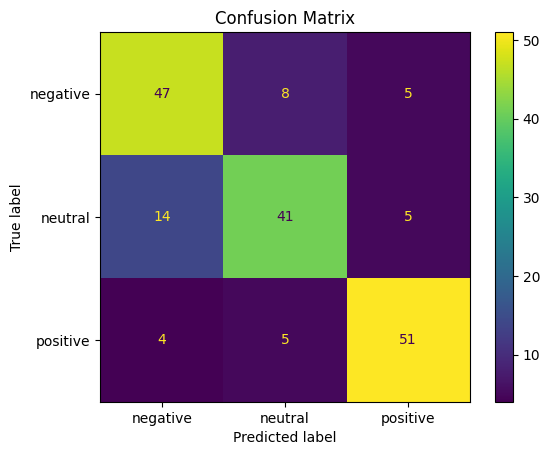

static accuracies:  [0.7222222222222222, 0.75, 0.7055555555555556, 0.7444444444444445, 0.7666666666666667, 0.7722222222222223]
static dictionary size:  [3000, 3000, 3000, 3000, 3000, 3000]


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from nltk.stem.snowball import EnglishStemmer
from sklearn.metrics import ConfusionMatrixDisplay

def static_model(classifier, dataset):
    X_test = dataset['content'].values
    y_test = dataset['rating'].values

    X_test_counts = count_vect.transform(X_test)
    X_test_tfidf = tfidf_transformer.transform(X_test_counts)

    predicted = classifier.predict(X_test_tfidf)
    print("Classification Report:")
    print(classification_report(y_test, predicted))

    disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test_tfidf, y_test)
    plt.title("Confusion Matrix")
    plt.show()

    return accuracy_score(y_test, predicted)

def stemming(doc):
    return (stemmer.stem(w) for w in analyzer(doc))

classifier = svm.LinearSVC(C=0.1)
X_initial_train = df['content'].values
y_initial_train = df['rating'].values

static_accuracies = []
static_dictionary_size = []

stemmer = EnglishStemmer()
analyzer = CountVectorizer().build_analyzer()
count_vect = CountVectorizer(analyzer=custom_analyzer, max_features=3000)
tfidf_transformer = TfidfTransformer()

# Text preprocessing, tokenizing, and filtering of stopwords
X_initial_train_counts = count_vect.fit_transform(X_initial_train)

# From occurrences to frequencies
X_initial_train_tfidf = tfidf_transformer.fit_transform(X_initial_train_counts)

# Training classifier with initial training set
classifier.fit(X_initial_train_tfidf, y_initial_train)

for i in range(6):
    static_dictionary_size.append(len(count_vect.vocabulary_))
    print("event ", i + 1)

    string_dataset = "df" + str(i + 1)
    event_dataset = globals()[string_dataset]
    static_accuracies.append(static_model(classifier, event_dataset))

print("static accuracies: ", static_accuracies)
print("static dictionary size: ", static_dictionary_size)


# Sliding Model


(78751, 3000)
(78751, 3000)
              precision    recall  f1-score   support

    negative       0.70      0.72      0.71        60
     neutral       0.72      0.60      0.65        60
    positive       0.74      0.85      0.79        60

    accuracy                           0.72       180
   macro avg       0.72      0.72      0.72       180
weighted avg       0.72      0.72      0.72       180

sliding_window_accuracies:
 [0.7222222222222222]


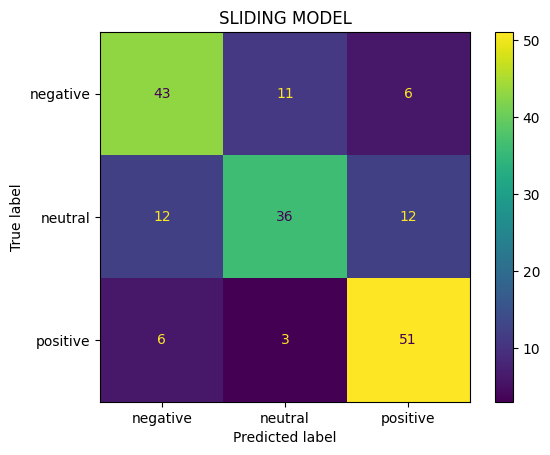

number event:  2
              precision    recall  f1-score   support

    negative       0.70      0.75      0.73        60
     neutral       0.74      0.67      0.70        60
    positive       0.82      0.85      0.84        60

    accuracy                           0.76       180
   macro avg       0.76      0.76      0.75       180
weighted avg       0.76      0.76      0.75       180

sliding_window_accuracies:
 [0.7222222222222222, 0.7555555555555555]


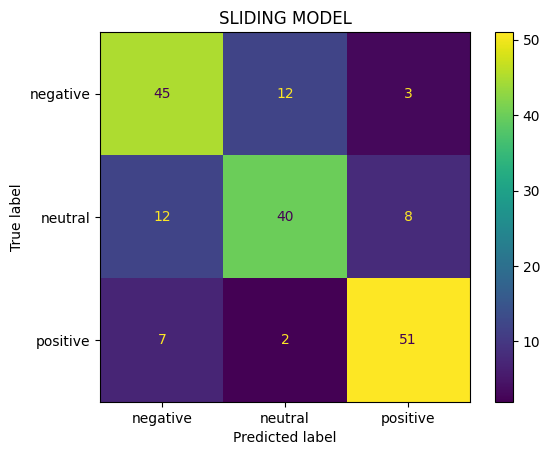

number event:  3
              precision    recall  f1-score   support

    negative       0.67      0.65      0.66        60
     neutral       0.66      0.70      0.68        60
    positive       0.79      0.77      0.78        60

    accuracy                           0.71       180
   macro avg       0.71      0.71      0.71       180
weighted avg       0.71      0.71      0.71       180

sliding_window_accuracies:
 [0.7222222222222222, 0.7555555555555555, 0.7055555555555556]


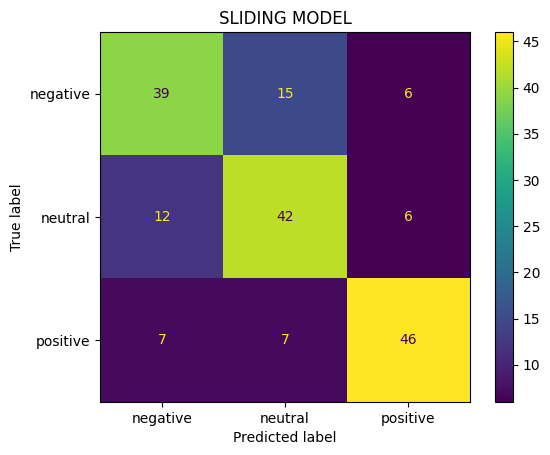

number event:  4
              precision    recall  f1-score   support

    negative       0.68      0.77      0.72        60
     neutral       0.72      0.63      0.67        60
    positive       0.86      0.85      0.86        60

    accuracy                           0.75       180
   macro avg       0.75      0.75      0.75       180
weighted avg       0.75      0.75      0.75       180

sliding_window_accuracies:
 [0.7222222222222222, 0.7555555555555555, 0.7055555555555556, 0.75]


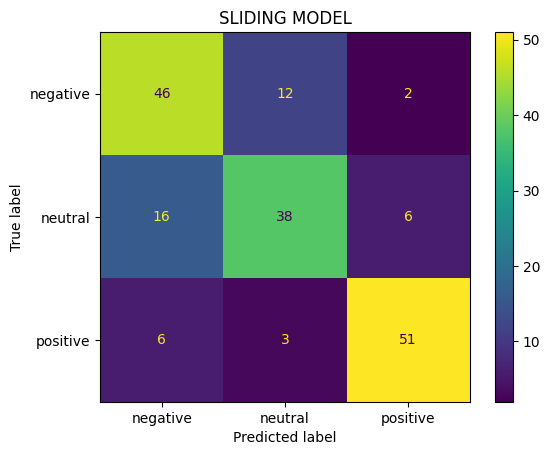

number event:  5
              precision    recall  f1-score   support

    negative       0.69      0.77      0.72        60
     neutral       0.77      0.62      0.69        60
    positive       0.85      0.92      0.88        60

    accuracy                           0.77       180
   macro avg       0.77      0.77      0.76       180
weighted avg       0.77      0.77      0.76       180

sliding_window_accuracies:
 [0.7222222222222222, 0.7555555555555555, 0.7055555555555556, 0.75, 0.7666666666666667]


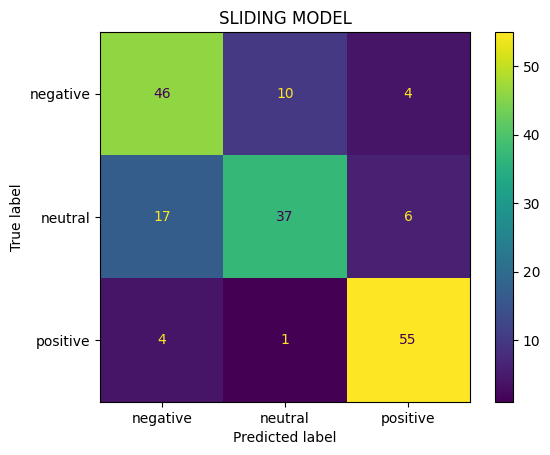

number event:  6
              precision    recall  f1-score   support

    negative       0.73      0.78      0.76        60
     neutral       0.75      0.72      0.74        60
    positive       0.86      0.85      0.86        60

    accuracy                           0.78       180
   macro avg       0.78      0.78      0.78       180
weighted avg       0.78      0.78      0.78       180

sliding_window_accuracies:
 [0.7222222222222222, 0.7555555555555555, 0.7055555555555556, 0.75, 0.7666666666666667, 0.7833333333333333]


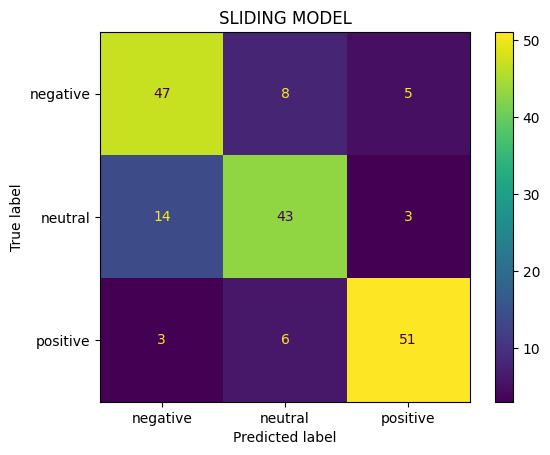

sliding window accuracies:  [0.7222222222222222, 0.7555555555555555, 0.7055555555555556, 0.75, 0.7666666666666667, 0.7833333333333333]
sliding window dictionary size: [3000, 3000, 3000, 3000, 3000, 3000]


In [ ]:
classifier = svm.LinearSVC(C=0.1)
stemmer = EnglishStemmer()
analyzer = CountVectorizer().build_analyzer()


def stemming(doc):
    return (stemmer.stem(w) for w in analyzer(doc))


count_vect = CountVectorizer(analyzer=custom_analyzer, max_features=3000)
tfidf_transformer = TfidfTransformer()
X_initial_train = df['content'].values
y_initial_train = df['rating'].values

# Text preprocessing, tokenizing and filtering of stopwords
X_initial_train_counts = count_vect.fit_transform(X_initial_train)
print(X_initial_train_counts.shape)

# From occurrences to frequencies
X_initial_train_tfidf = tfidf_transformer.fit_transform(X_initial_train_counts)
print(X_initial_train_tfidf.shape)

sliding_window_accuracies = []
sliding_dictionary_size = []

# Training classifier with initial training set
classifier.fit(X_initial_train_tfidf, y_initial_train)

number_event = 1
X_train = X_initial_train
y_train = y_initial_train

while number_event <= 6:
    current_event_dataset = globals()["df" + str(number_event)]

    # building the training set with 60 new comments from the previous event
    # and removing 60 oldest comments
    if number_event > 1:
        print("number event: ", number_event)
        previous_event_dataset_string = "df" + str(number_event - 1)
        previous_event_dataset = globals()[previous_event_dataset_string]
        X_train = np.append(X_train, previous_event_dataset['content'].values)
        y_train = np.append(y_train, previous_event_dataset['rating'].values)

        X_train = X_train[60:]
        y_train = y_train[60:]

    # Text preprocessing, tokenizing and filtering of stopwords
    X_train_counts = count_vect.fit_transform(X_train)
    # From occurrences to frequencies
    X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

    classifier.fit(X_train_tfidf, y_train)

    X_test = current_event_dataset['content'].values
    y_test = current_event_dataset['rating'].values

    X_test_counts = count_vect.transform(X_test)
    X_test_tfidf = tfidf_transformer.transform(X_test_counts)

    predicted = classifier.predict(X_test_tfidf)
    sliding_dictionary_size.append(len(count_vect.vocabulary_))
    sliding_window_accuracies.append(accuracy_score(y_test, predicted))

    print(metrics.classification_report(y_test, predicted))

    print("sliding_window_accuracies:\n", sliding_window_accuracies)
    ConfusionMatrixDisplay.from_predictions(y_test, predicted)
    plt.title("SLIDING MODEL")
    plt.show()
    number_event = number_event + 1

print("sliding window accuracies: ", sliding_window_accuracies)
print("sliding window dictionary size:", sliding_dictionary_size)

# Incremental Model

              precision    recall  f1-score   support

    negative       0.70      0.72      0.71        60
     neutral       0.72      0.60      0.65        60
    positive       0.74      0.85      0.79        60

    accuracy                           0.72       180
   macro avg       0.72      0.72      0.72       180
weighted avg       0.72      0.72      0.72       180



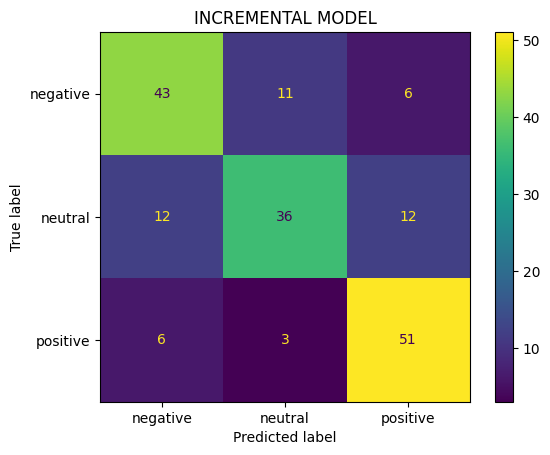

number event:  2
              precision    recall  f1-score   support

    negative       0.70      0.75      0.73        60
     neutral       0.74      0.67      0.70        60
    positive       0.82      0.85      0.84        60

    accuracy                           0.76       180
   macro avg       0.76      0.76      0.75       180
weighted avg       0.76      0.76      0.75       180



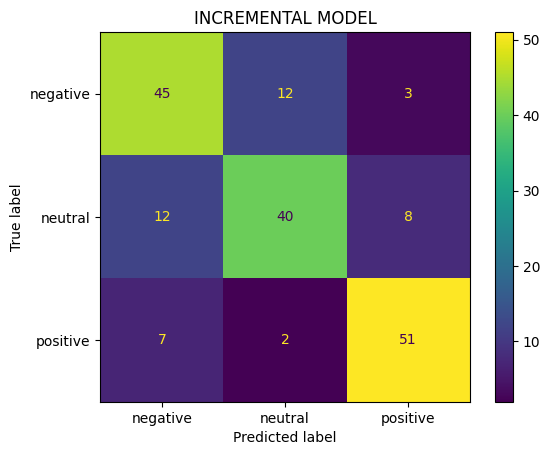

number event:  3
              precision    recall  f1-score   support

    negative       0.67      0.65      0.66        60
     neutral       0.67      0.70      0.68        60
    positive       0.80      0.78      0.79        60

    accuracy                           0.71       180
   macro avg       0.71      0.71      0.71       180
weighted avg       0.71      0.71      0.71       180



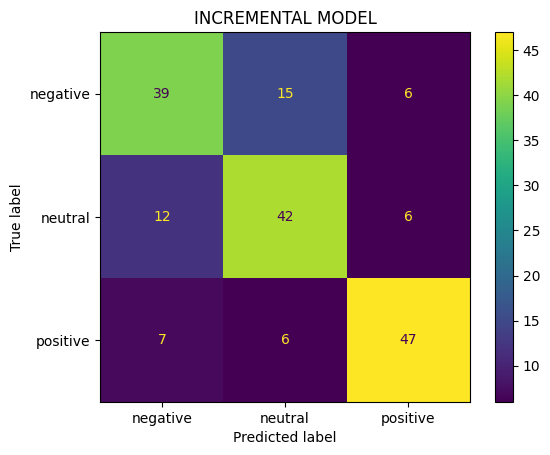

number event:  4
              precision    recall  f1-score   support

    negative       0.68      0.77      0.72        60
     neutral       0.72      0.63      0.67        60
    positive       0.86      0.85      0.86        60

    accuracy                           0.75       180
   macro avg       0.75      0.75      0.75       180
weighted avg       0.75      0.75      0.75       180



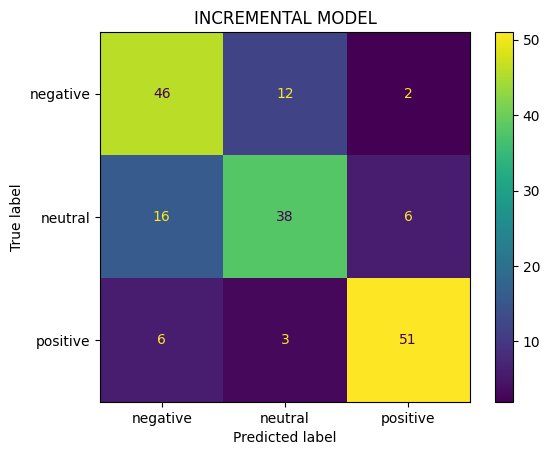

number event:  5
              precision    recall  f1-score   support

    negative       0.70      0.77      0.73        60
     neutral       0.77      0.62      0.69        60
    positive       0.85      0.93      0.89        60

    accuracy                           0.77       180
   macro avg       0.77      0.77      0.77       180
weighted avg       0.77      0.77      0.77       180



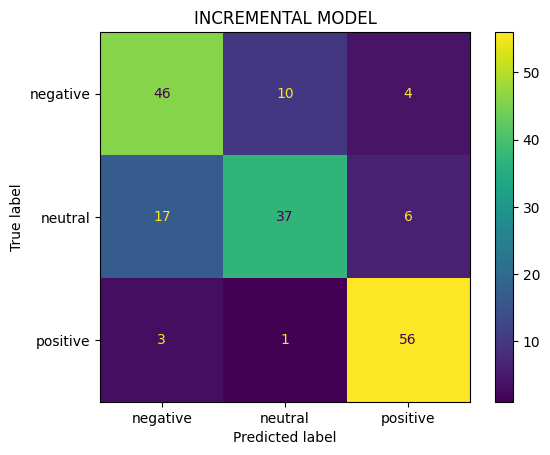

number event:  6
              precision    recall  f1-score   support

    negative       0.72      0.78      0.75        60
     neutral       0.77      0.72      0.74        60
    positive       0.86      0.85      0.86        60

    accuracy                           0.78       180
   macro avg       0.79      0.78      0.78       180
weighted avg       0.79      0.78      0.78       180



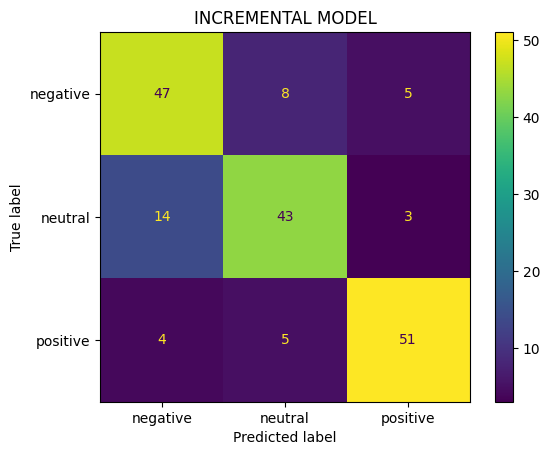

incremental accuracies:  [0.7222222222222222, 0.7555555555555555, 0.7111111111111111, 0.75, 0.7722222222222223, 0.7833333333333333]
incremental dictionary size: [3000, 3000, 3000, 3000, 3000, 3000]


In [ ]:
classifier = svm.LinearSVC(C=0.1)
stemmer = EnglishStemmer()
analyzer = CountVectorizer().build_analyzer()


def stemming(doc):
    return (stemmer.stem(w) for w in analyzer(doc))


count_vect = CountVectorizer(analyzer=custom_analyzer, max_features=3000)
tfidf_transformer = TfidfTransformer()
X_initial_train = df['content'].values
y_initial_train = df['rating'].values

# Text preprocessing, tokenizing and filtering of stopwords
X_initial_train_counts = count_vect.fit_transform(X_initial_train)

# From occurrences to frequencies
X_initial_train_tfidf = tfidf_transformer.fit_transform(X_initial_train_counts)

incremental_accuracies = []
incremental_dictionary_size = []

# Training classifier with initial training set
classifier.fit(X_initial_train_tfidf, y_initial_train)

number_event = 1
X_train = X_initial_train
y_train = y_initial_train

while number_event <= 6:
    current_event_dataset = globals()["df" + str(number_event)]

    # building the training set with 60 new comments from the previous event

    if number_event > 1:
        print("number event: ", number_event)
        previous_event_dataset_string = "df" + str(number_event - 1)
        previous_event_dataset = globals()[previous_event_dataset_string]
        X_train = np.append(X_train, previous_event_dataset['content'].values)
        y_train = np.append(y_train, previous_event_dataset['rating'].values)

    # Text preprocessing, tokenizing and filtering of stopwords
    X_train_counts = count_vect.fit_transform(X_train)
    # From occurrences to frequencies
    X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

    classifier.fit(X_train_tfidf, y_train)

    X_test = current_event_dataset['content'].values
    y_test = current_event_dataset['rating'].values

    X_test_counts = count_vect.transform(X_test)
    X_test_tfidf = tfidf_transformer.transform(X_test_counts)

    predicted = classifier.predict(X_test_tfidf)
    incremental_dictionary_size.append(len(count_vect.vocabulary_))
    incremental_accuracies.append(accuracy_score(y_test, predicted))

    print(metrics.classification_report(y_test, predicted))
    ConfusionMatrixDisplay.from_predictions(y_test, predicted)
    plt.title("INCREMENTAL MODEL")
    plt.show()
    number_event = number_event + 1

print("incremental accuracies: ", incremental_accuracies)
print("incremental dictionary size:", incremental_dictionary_size)